Bike Sharing Dataset
- This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
- Regression
- 13 features
- 17389 instances

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from math import log
import seaborn as sns
from scipy.stats import skew

Loading Datasets & General Overview 

In [2]:
hour_data = pd.read_csv('/Users/slavicagjorgieva/Desktop/ML.ex0/ML.ex0/data/bike+sharing+dataset/hour.csv')
day_data = pd.read_csv('/Users/slavicagjorgieva/Desktop/ML.ex0/ML.ex0/data/bike+sharing+dataset/day.csv')
hour_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [33]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [3]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [34]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
print(hour_data.shape)
print(day_data.shape)   

(17379, 17)
(731, 16)


In [5]:
print(hour_data.isna().sum())  #expecting 0 missing values
print(day_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
day_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
hour_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Combining Datsets and Cleaning Agregated Duplicate collumns

In [8]:
#merge on dteday
merged_data = pd.merge(hour_data, day_data, on='dteday', suffixes=('_hourly', '_daily'))
hourly_sum = merged_data.groupby('dteday')[['cnt_hourly', 'casual_hourly', 'registered_hourly']].sum()

In [9]:
merged_data

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [15]:

merged_data_cleaned = merged_data.drop(columns=['instant_daily', 'season_daily', 'yr_daily', 'cnt_daily', 'mnth_daily', 'holiday_daily', 'weekday_daily', 'workingday_daily','weathersit_daily', 'casual_daily', 'registered_daily','temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily'])

merged_data_cleaned

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Graphical Analysis of Attributes

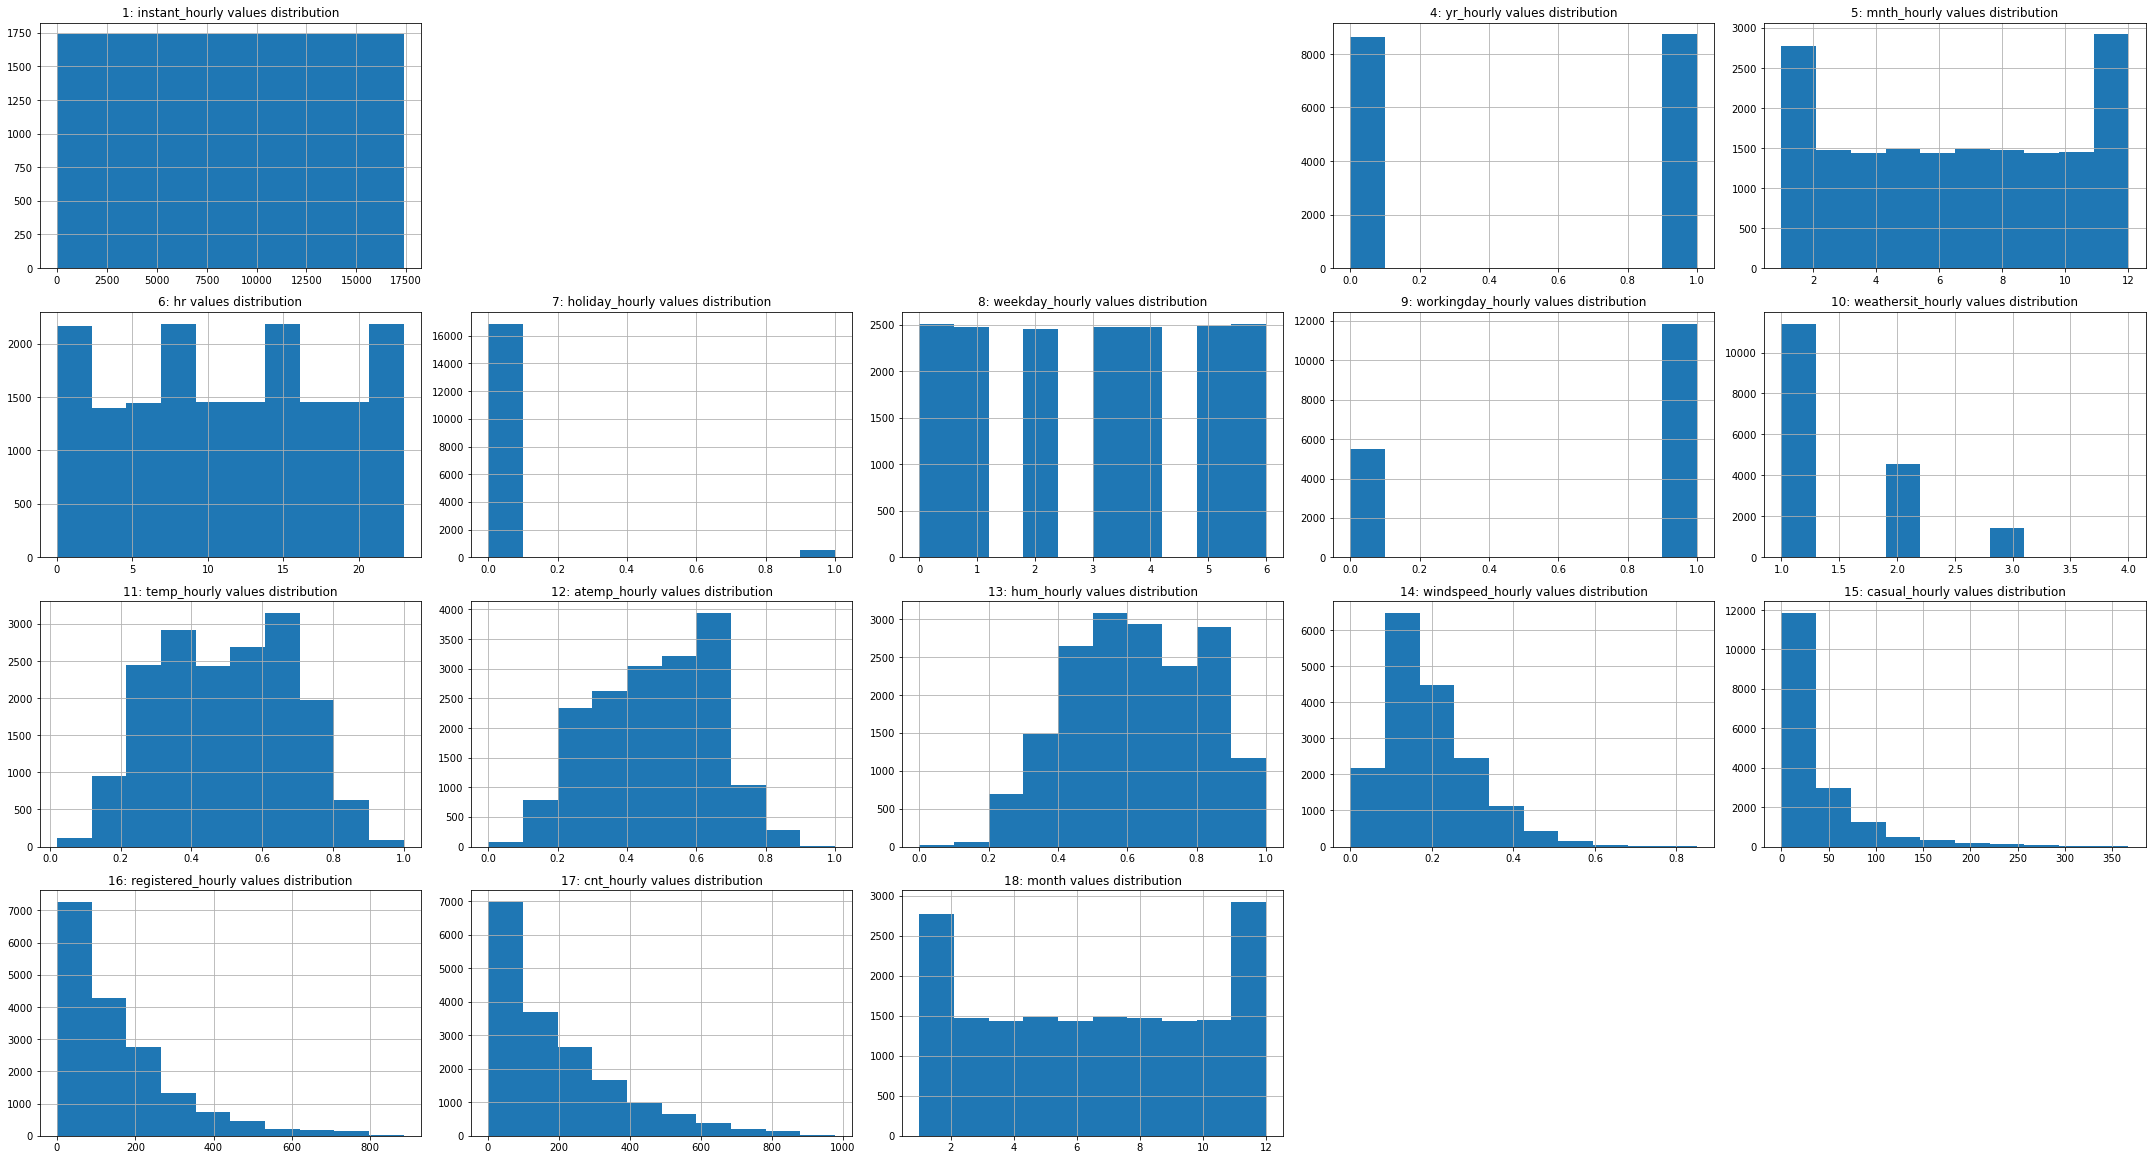

In [39]:
def draw_histograms(df):
    vars = df.columns
    n_vars = len(vars)
    ngrid = int(sqrt(n_vars)) + 1

    fig = plt.figure(figsize=(ngrid * 6, ngrid * 4))
    
    for ix, var in enumerate(vars):
        if df[var].dtype in ['int64', 'float64']:  #only plotting numeric variables
            ax = fig.add_subplot(ngrid, ngrid, ix + 1)
            df[var].hist(bins=10, ax=ax)
            ax.set_title(f"{ix + 1}: " + var + " values distribution")
    
    fig.tight_layout()
    plt.show()
draw_histograms(merged_data_cleaned)

Explination of Attributes by Data Metadata
- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Analysis of histograms 

- Some histograms show skewed distributions. For example, bike rental counts where most of the values are lower and only a few instances have high rentals. This indicates that on most days/hours, rentals are moderate, but on a few occasions, rentals spike.
- The temperature and humidity distributions appear more normal (bell-shaped), especially for temp_hourly or atemp_hourly. These are continuous variables and follow a more normal distribution 

Analysis of Skewnes

Skewness of numerical variables:
 casual_hourly        2.499021
registered_hourly    1.557770
atemp_hourly        -0.090421
hum_hourly          -0.111278
windspeed_hourly     0.574856
dtype: float64


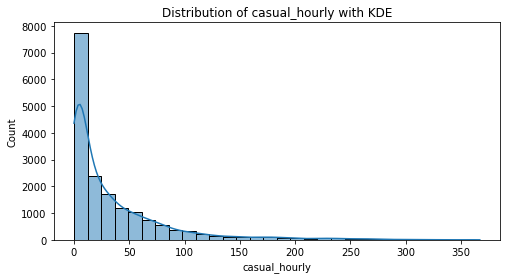

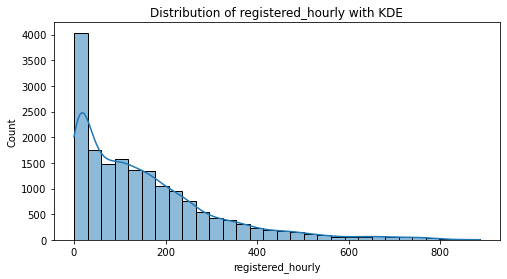

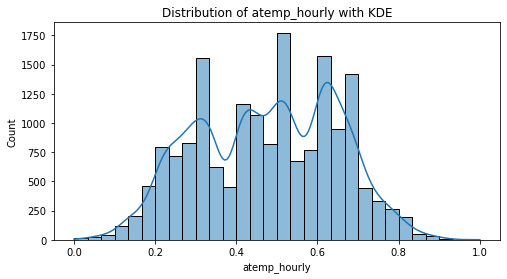

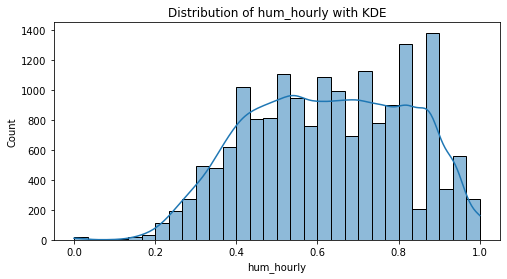

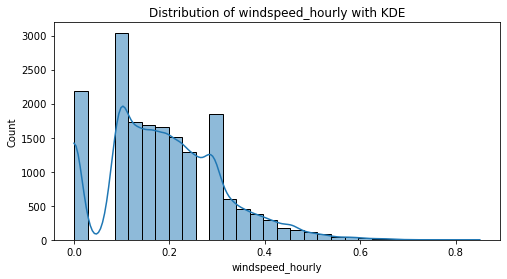

In [41]:
numerical_columns = ['casual_hourly', 'registered_hourly', 'temp_hourly', 'hum_hourly', 'windspeed_hourly']

skewness_values = merged_data[numerical_columns].apply(skew)
print("Skewness of numerical variables:\n", skewness_values)

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col} with KDE")
    plt.show()

- The majority of casual users rent fewer bikes, but occasionally, there are spikes in casual bike usage.
- The distributions suggest that low wind speeds likely encourage bike rentals.

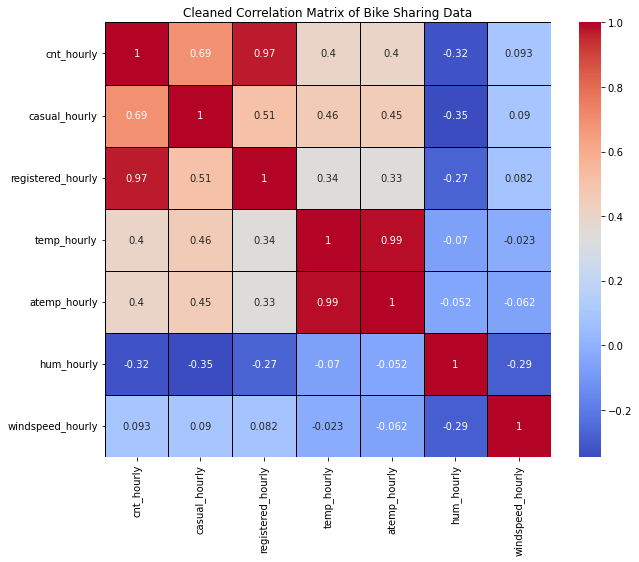

In [42]:
numerical_columns_cleaned = ['cnt_hourly', 'casual_hourly', 'registered_hourly', 'temp_hourly', 
                             'atemp_hourly', 'hum_hourly', 'windspeed_hourly']
correlation_matrix_cleaned = merged_data_cleaned[numerical_columns_cleaned].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Cleaned Correlation Matrix of Bike Sharing Data')
plt.show()

- Correlatuion of 0.97 between cnt_hourly and registered_hourly, 0.69 between cnt_hourly and casual_hourly shows that when registered users rent more bikes, casual rent more as well, and vice versa.
- Moderate positive correlation (0.40) between bike rentals (cnt_hourly) and temperature (temp_hourly) shows that higher temperatures is somewhat associated with higher bike rentals. However, this correlation is not extremely strong, indicating that other factors determine bike rentals.
- Weak negative correlation between windspeed_hourly and bike rentals (cnt_hourly: -0.32, casual_hourly: -0.35, registered_hourly: -0.27) meaning higher wind speeds are associated with fewer bike rentals.


Suggestions
- maybe we can drop one of temp_hourly and atemp_hourly in the predictive modeling later on to avoid multicollinearity.

Categorical Variables Analysis 

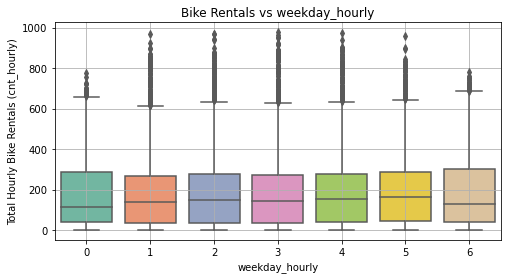

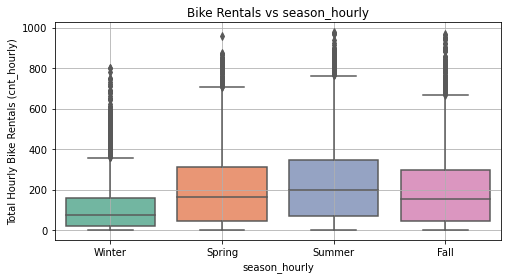

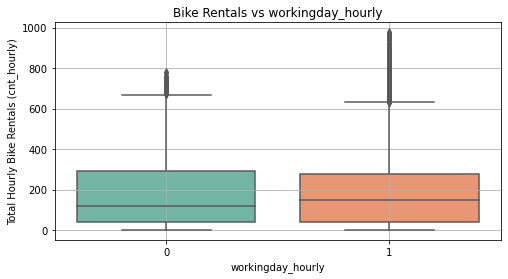

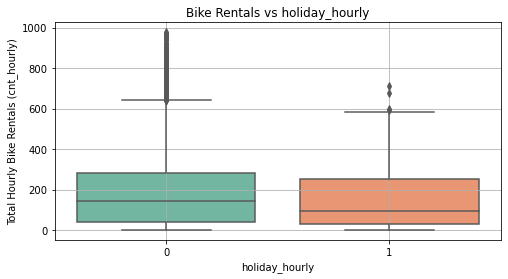

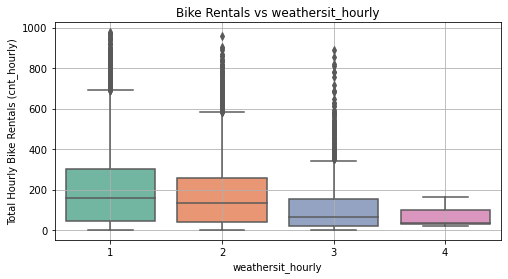

In [44]:
categorical_columns = ['weekday_hourly','season_hourly', 'workingday_hourly', 'holiday_hourly', 'weathersit_hourly']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_data_cleaned[col], y=merged_data_cleaned['cnt_hourly'], palette='Set2')
    plt.title(f'Bike Rentals vs {col}')
    plt.xlabel(col)
    plt.ylabel('Total Hourly Bike Rentals (cnt_hourly)')
    plt.grid(True)
    plt.show()

1. Bike Rentals vs. weathersit_hourly: Clear weather significantly boosts bike rentals, while rainy conditions lead to a marked decrease.
2. Bike Rentals vs. holiday_hourly: Bike rentals are higher on working days compared to holidays, indicating a strong commuting trend.
3. Bike Rentals vs. workingday_hourly: Warm weather in spring and summer encourages biking, whereas winter leads to reduced rentals.
4. Bike Rentals vs. season_hourly: Weekdays see more rentals than weekends, emphasizing biking for commuting over leisure on working days.

Hourly Distribution Analysis

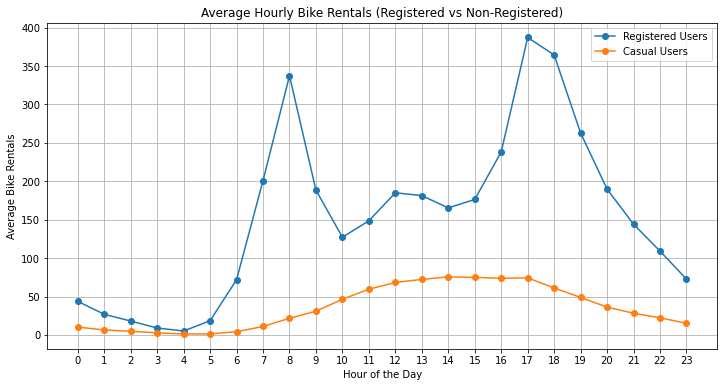

In [20]:

hourly_group = merged_data_cleaned.groupby('hr')[['registered_hourly', 'casual_hourly']].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_group.index, hourly_group['registered_hourly'], label='Registered Users', marker='o')
plt.plot(hourly_group.index, hourly_group['casual_hourly'], label='Casual Users', marker='o')
plt.title('Average Hourly Bike Rentals (Registered vs Non-Registered)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

- spikes during rush hours(around 8am and 17pm) are much more evident in registerd users than casual

Monthly Distributions Analysis

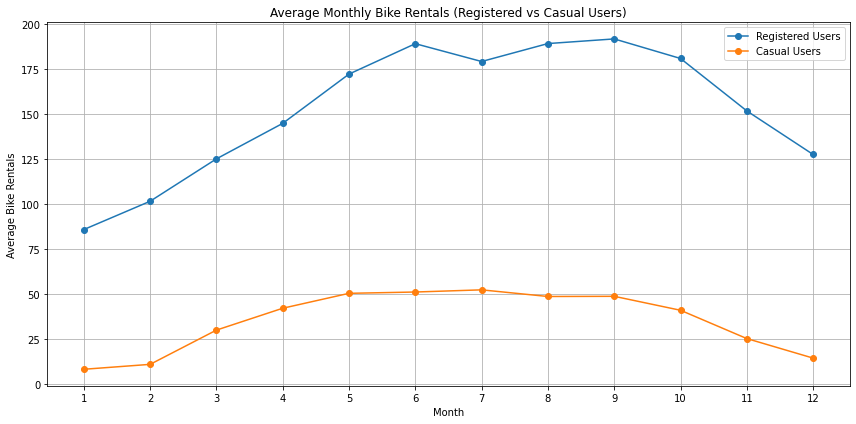

In [23]:
merged_data_cleaned['dteday'] = pd.to_datetime(merged_data_cleaned['dteday'])

merged_data_cleaned['month'] = merged_data_cleaned['dteday'].dt.month

monthly_group = merged_data_cleaned.groupby('month')[['registered_hourly', 'casual_hourly']].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_group.index, monthly_group['registered_hourly'], label='Registered Users', marker='o')
plt.plot(monthly_group.index, monthly_group['casual_hourly'], label='Casual Users', marker='o')
plt.title('Average Monthly Bike Rentals (Registered vs Casual Users)')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Target Variable Analysis

In [46]:
merged_data_cleaned['cnt_hourly'].describe()


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt_hourly, dtype: float64

In [47]:
count_skewness = skew(merged_data_cleaned['cnt_hourly'])
print(f"\nSkewness of cnt_hourly: {count_skewness:.2f}")


Skewness of cnt_hourly: 1.28


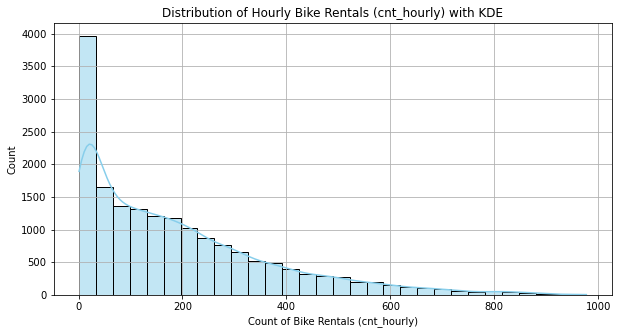

In [50]:

plt.figure(figsize=(10, 5))
sns.histplot(merged_data_cleaned['cnt_hourly'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Hourly Bike Rentals (cnt_hourly) with KDE')
plt.xlabel('Count of Bike Rentals (cnt_hourly)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The histogram shows a right-skewed distribution. The majority of the bike rentals occur at lower counts, with the frequency tapering off as the count increases.
- There is a significant peak at 0 rentals, indicating that there are many hours with no bike rentals.

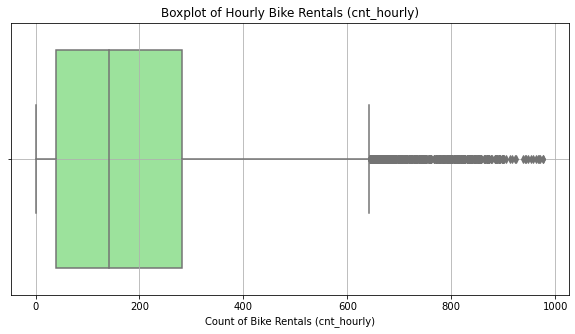

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_data_cleaned['cnt_hourly'], color='lightgreen')
plt.title('Boxplot of Hourly Bike Rentals (cnt_hourly)')
plt.xlabel('Count of Bike Rentals (cnt_hourly)')
plt.grid(True)
plt.show()

Most bike rentals occur within a specific range, but there are notable exceptions (outliers) that reflect periods of high demand.